In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import collections 

## Correlation Strategy
**Purpose of this notebook:** Find pairs of stocks based on the correlation of their daily returns. Output a `.csv` file with the names of the stocks included in the correlation strategy. Perform  data exploration necessary to code the correlation strategy as a class in a `.py` script.

## 1. Load Data

In [366]:
# load data
dat = pd.read_csv("finance/finance.csv")

# info on dat
print("This data has {} rows and {} columns.".format(dat.shape[0], dat.shape[1]))

# head
dat.head()

This data has 3519 rows and 9 columns.


,Symbol,Description,OrderID,Quantity,Action,Exchange,Side,Price,News
0,AAL,American Airlines Group Inc,1101,455000,A,1,B,44.05,0
1,AAPL,Apple Inc,1102,685000,A,1,B,128.75,0
2,ADBE,Adobe Systems Inc,1103,189000,A,1,B,113.36,0
3,ADI,Analog Devices Inc,1104,181000,A,1,B,76.17,0
4,ADP,Automatic Data Processing Inc,1105,953000,A,1,B,95.25,0


We assume that each of the 69 values by symbol are a representation of the current market price at a given time step in order to claculate returns among the time setps.

In [482]:
# initialize empty dataframe
df = pd.DataFrame()

# loop over each ticker to find return over time
for i in dat.Symbol.unique():
    # calculate return among time steps for one symbol
    temp = pd.DataFrame((dat[dat.Symbol==i].Price - dat[dat.Symbol==i].Price.shift(1))/dat[dat.Symbol==i].Price.shift(1))

    # rename column name to the name of the symbol
    temp.rename(columns={"Price":i}, inplace=True)

    # reset index
    temp.reset_index(drop=True, inplace=True)

    # concat
    df = pd.concat([df, temp], axis=1)
    
# drop first row due to na, and reset index
df = df.iloc[1:,:].reset_index(drop=True)

# display data structure
df.head()

,AAL,AAPL,ADBE,ADI,ADP,ADSK,AKAM,ALXN,AMAT,AMGN,...,FOXA,GILD,GOOG,GOOGL,HSIC,ILMN,INCY,INTC,INTU,ISRG
0,0.003405,0.000000,0.044548,0.000131,0.000000,-0.022515,0.000437,0.001360,0.153619,0.000251,...,0.005693,0.063581,0.000182,0.000233,0.000626,0.000309,0.000707,0.000548,0.000595,0.006528
1,0.177602,-0.007767,-0.042648,-0.052638,0.000000,0.073379,-0.000436,-0.001358,-0.005395,-0.000250,...,-0.005660,-0.059781,-0.000182,-0.000233,-0.000625,-0.000309,-0.043891,-0.000547,0.084310,-0.006485
2,-0.112200,0.008376,0.000441,0.057780,0.001050,-0.046201,0.024745,0.001134,0.003140,0.000125,...,0.000316,-0.019912,0.000019,0.000245,0.001001,0.000681,0.021270,0.002738,-0.077128,0.000201
3,-0.046743,-0.000543,-0.044529,-0.002227,-0.001049,-0.000738,-0.038352,0.017740,-0.003130,-0.000125,...,-0.000316,0.020317,-0.000019,0.005886,-0.001000,-0.000680,-0.000724,0.079192,-0.035211,-0.014545
4,-0.055165,-0.037903,0.046788,0.000394,0.028136,-0.005044,-0.071196,-0.054146,0.000571,0.001002,...,-0.123023,0.002609,-0.001628,-0.005974,0.000000,0.001176,0.000241,-0.075658,0.036760,0.014556


## 2. Correlations

In [484]:
# create correlation matrix
corr_mtrx = df.corr(method = "pearson")

# initialize 
res_lst = []

# loop over each symbol to find the symbol with highest correlation and the correlation coefficient
for i in corr_mtrx.columns:
    # find array
    arr = list(corr_mtrx[i])

    # set 1 to 0to be able to use np.argmax
    arr = [i if i != 1.0 else 0 for i in arr]

    # find index of max
    symbol_max_corr = corr_mtrx.index[np.argmax(arr)]

    # append results
    res_lst.append([i, symbol_max_corr, max(arr)])
    
# create dataframe
df_corr = pd.DataFrame(res_lst, columns=["symbol_1", "symbol_2", "correlation"])

In [488]:
# find top 10 correlated pairs
df_corr_top_10 = df_corr[df_corr.correlation > 0.38].copy()

# sort by correlation
df_corr_top_10.sort_values("correlation", inplace=True, ascending=False)

# drop same pairs
df_corr = df_corr.drop_duplicates("correlation")

# drop duplicates to only allow one-directional pairs
df_corr_top_10.drop_duplicates("symbol_1", inplace=True)
df_corr_top_10.drop_duplicates("symbol_2", inplace=True)

# drop pair (AKAM, CERN) to further only allow one-directional pairs
df_corr_top_10 = df_corr_top_10[(df_corr_top_10.symbol_1!="AKAM") & (df_corr_top_10.symbol_2!="CERN")]

# reset index
df_corr_top_10.reset_index(drop=True, inplace=True)

# display
df_corr_top_10

,symbol_1,symbol_2,correlation
0,BMRN,GOOGL,0.657220
1,CSCO,ISRG,0.474504
2,CTXS,INTC,0.439725
3,CERN,CTRP,0.436479
4,ADI,DISCK,0.427381
5,ALXN,FAST,0.400195


In [384]:
# save as csv
df_corr_top_10.to_csv("df_corr_top_10.csv")

In [489]:
# list of pairs
pairs = list(zip(df_corr_top_10.symbol_1, df_corr_top_10.symbol_2))

# display result
pairs

[('BMRN', 'GOOGL'),
 ('CSCO', 'ISRG'),
 ('CTXS', 'INTC'),
 ('CERN', 'CTRP'),
 ('ADI', 'DISCK'),
 ('ALXN', 'FAST')]

## 3. Correlation Trading Strategy

### 3.1. Find Rolling z-scores

In [386]:
# function that calculates rolling zscore by ticker
def z_score(df, symbol):
    # define window
    window=10
    
    # slice df by symbol
    df = df[df['Symbol'] == symbol].copy()
    
    # find mean
    df['rolling_mean'] = df['Price'].rolling(window=window, min_periods=window).mean()
    
    # find std
    df['rolling_std'] = df['Price'].rolling(window=window, min_periods=window).std()
    
    # find zscore
    df['rolling_z_score'] = (df['Price']-df['rolling_mean'])/df['rolling_std']
    
    # return
    return df

In [387]:
# initializations
symbols = dat.Symbol.unique()
indy = z_score(dat,'AAL').columns
new = pd.DataFrame(columns = indy)

# iterate over each symbol
for i in range(len(symbols)):
    new = new.append(z_score(dat,symbols[i]))

# new df
data = new.dropna(axis = 0)

# display result
data

,Symbol,Description,OrderID,Quantity,Action,Exchange,Side,Price,News,rolling_mean,rolling_std,rolling_z_score
459,AAL,American Airlines Group Inc,3101,441000,M,3,B,44.01,0,44.150,3.316963,-0.042207
510,AAL,American Airlines Group Inc,2201,660000,M,2,S,44.04,0,44.149,3.316998,-0.032861
561,AAL,American Airlines Group Inc,1101,832000,M,1,B,43.99,50,44.128,3.317304,-0.041600
612,AAL,American Airlines Group Inc,1201,297000,M,1,S,40.51,100,42.974,2.001534,-1.231056
663,AAL,American Airlines Group Inc,3201,439000,M,3,S,37.08,0,42.061,2.403402,-2.072479
...,...,...,...,...,...,...,...,...,...,...,...,...
3314,ISRG,Intuitive Surgical Inc,3151,735000,M,3,B,697.17,0,697.225,0.065192,-0.843661
3365,ISRG,Intuitive Surgical Inc,2251,849000,M,2,S,697.24,0,697.227,0.065328,0.198995
3416,ISRG,Intuitive Surgical Inc,3151,857000,M,3,B,697.18,0,697.206,0.032728,-0.794431
3467,ISRG,Intuitive Surgical Inc,1151,820000,M,1,B,697.16,100,697.198,0.033267,-1.142287


### 3.2. Calculate deltas between z-scores for each pair and the mean for each pair

In [388]:
# initialize
res = []

# loop over each of our pairs to find the mean of their delta
for i in range(len(pairs)):
    # find the delta between each of the pairs
    delta = pd.Series(data[data.Symbol == pairs[i][0]].rolling_z_score).reset_index(drop=True)-pd.Series(data[data.Symbol == pairs[i][1]].rolling_z_score).reset_index(drop=True)
    
    # append pairs and the mean of the delta
    res.append([pairs[i][0], pairs[i][1], delta.mean()])

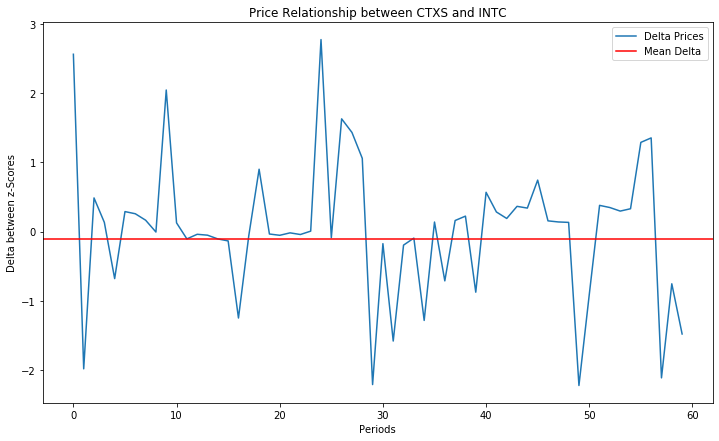

In [389]:
# example
pair = 2

# find delta
delta = pd.Series(data[data.Symbol == res[pair][0]].rolling_z_score).reset_index(drop=True)-pd.Series(data[data.Symbol == res[pair][1]].rolling_z_score).reset_index(drop=True)

# plot
plt.figure(figsize=(12,7))
delta.plot()
plt.axhline(res[-1][2], c="r")
plt.legend(["Delta Prices", "Mean Delta"])
plt.xlabel("Periods")
plt.ylabel("Delta between z-Scores")
plt.title("Price Relationship between " + str(res[pair][0]) + " and " + str(res[pair][1]))
plt.show()

**Comments:**
- Increasing delta means: symbol_1 increases while symbol_2 doesn't OR symbol_2 decreases while symbol_1 doesn't 
> If current delta > mean delta: BUY symbol_2 and SELL symbol_1
- Decreaseing delta means: symbol_1 decreases while symbol_2 doesn't OR symbol_2 increases while symbol_1 doesn't
> If current delta < mean delta: SELL symbol_2 and BUY symbol_1
- We have to define a threshold/a delta large enough to execute the trade
> In this case we define the threshold to be 1.5

In [390]:
# example with threshold
pair = 2

for i in delta:
    if i > 1.5:
        print("buy " + str(res[pair][1]) + " sell " + str(res[pair][0]))
    elif i < -1.5:
        print("buy " + str(res[pair][0]) + " sell " + str(res[pair][1]))
    else:
        print("hold")

buy INTC sell CTXS
buy CTXS sell INTC
hold
hold
hold
hold
hold
hold
hold
buy INTC sell CTXS
hold
hold
hold
hold
hold
hold
hold
hold
hold
hold
hold
hold
hold
hold
buy INTC sell CTXS
hold
buy INTC sell CTXS
hold
hold
buy CTXS sell INTC
hold
buy CTXS sell INTC
hold
hold
hold
hold
hold
hold
hold
hold
hold
hold
hold
hold
hold
hold
hold
hold
hold
buy CTXS sell INTC
hold
hold
hold
hold
hold
hold
hold
buy CTXS sell INTC
hold
hold
